In [272]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
color = sns.color_palette()
import matplotlib.mlab as mlab
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [30]:
import os
#os.chdir('/')

## Loading our final datasets

In [31]:
final_state_data = pd.read_csv('final_data_states.csv')
#final_industry_data = pd.read_csv('Data and Preprocessing/Data/industry_allyear.csv')
#final_state_industry_data = pd.read_csv('Data and Preprocessing/Data/Codes.csv')

In [38]:
final_state_data = final_state_data.drop(['Unnamed: 0'], axis=1)

In [55]:
column_description = pd.DataFrame(final_state_data.dtypes)
column_description.head(15)

,0
GeoName,object
year,int64
Gross domestic product (GDP) by state,float64
Quantity indexes for real GDP by state,float64
Real GDP by state,float64
pce Clothing and footwear,float64
pce Food and beverages purchased for off-premises consumption,float64
pce Furnishings and durable household equipment,float64
pce Gasoline and other energy goods,float64
pce Motor vehicles and parts,float64


_______________

## Start by separating the features with the targets

In [53]:
contract_establish = final_state_data['contract_establish']
end_establish = final_state_data['end_establish']
expand_establish = final_state_data['expand_establish']
net_change = final_state_data['net_change']
open_establish = final_state_data['open_establish']
total_contract = final_state_data['total_contract']
total_expand = final_state_data['total_expand']

In [73]:
features = final_state_data.drop(['contract_establish', 'end_establish', 'expand_establish', 'net_change',
                                        'open_establish', 'total_contract', 'total_expand', 'GeoName',
                                 'year', 'state', 'Top Industry'], axis=1)

## Explore how the features are correlated to the target

In [74]:
correlation = final_state_data.select_dtypes(include=[np.number]).corr()

In [80]:
correlation_target = correlation[['contract_establish','end_establish', 'expand_establish', 'net_change', 'open_establish', 
             'total_contract', 'total_expand' ]]

In [98]:
corr_contract_establish = pd.DataFrame(correlation_target['contract_establish'].loc[
    correlation_target['contract_establish'] > 0.95].sort_values(ascending=False))
print(corr_contract_establish)

                                   contract_establish
contract_establish                           1.000000
total_contract                               0.998525
expand_establish                             0.991177
total_expand                                 0.990913
Wage and salary employment                   0.985066
Population (persons)                         0.981079
Total employment                             0.980067
Total employment (number of jobs)            0.980067
open_establish                               0.971668
end_establish                                0.970211
Real GDP by state                            0.964467


In [96]:
corr_end_establish = pd.DataFrame(correlation_target['end_establish'].loc[
    correlation_target['end_establish'] > 0.9].sort_values(ascending=False))
print(corr_end_establish)

                                   end_establish
end_establish                           1.000000
open_establish                          0.993701
total_contract                          0.981933
total_expand                            0.977108
contract_establish                      0.970211
expand_establish                        0.967299
Veterans' life insurance benefits       0.948621
Population (persons)                    0.935398
Wage and salary employment              0.934724
Total employment                        0.927428
Total employment (number of jobs)       0.927428
Monetary interest receipts              0.916698
Real GDP by state                       0.908059
Personal interest income                0.907338


In [100]:
corr_expand_establish = pd.DataFrame(correlation_target['expand_establish'].loc[
    correlation_target['expand_establish'] > 0.95].sort_values(ascending=False))
print(corr_expand_establish)

                                   expand_establish
expand_establish                           1.000000
total_expand                               0.998852
contract_establish                         0.991177
total_contract                             0.990981
Wage and salary employment                 0.985780
Population (persons)                       0.982500
Total employment                           0.981720
Total employment (number of jobs)          0.981720
open_establish                             0.976339
end_establish                              0.967299
Real GDP by state                          0.965467


In [101]:
corr_open_establish = pd.DataFrame(correlation_target['open_establish'].loc[
    correlation_target['open_establish'] > 0.95].sort_values(ascending=False))
print(corr_open_establish)

                                   open_establish
open_establish                           1.000000
end_establish                            0.993701
total_expand                             0.985577
total_contract                           0.981659
expand_establish                         0.976339
contract_establish                       0.971668
Veterans' life insurance benefits        0.951480


In [106]:
corr_net_change = pd.DataFrame(correlation_target['net_change'].loc[
    correlation_target['net_change'] > 0.9].sort_values(ascending=False))
print(corr_net_change)

            net_change
net_change         1.0


In [108]:
corr_total_contract = pd.DataFrame(correlation_target['total_contract'].loc[
    correlation_target['total_contract'] > 0.95].sort_values(ascending=False))
print(corr_total_contract)

                                   total_contract
total_contract                           1.000000
contract_establish                       0.998525
total_expand                             0.992973
expand_establish                         0.990981
end_establish                            0.981933
open_establish                           0.981659
Wage and salary employment               0.978907
Population (persons)                     0.975945
Total employment                         0.973368
Total employment (number of jobs)        0.973368
Real GDP by state                        0.956842


In [110]:
corr_total_expand = pd.DataFrame(correlation_target['total_expand'].loc[
    correlation_target['total_expand'] > 0.95].sort_values(ascending=False))
print(corr_total_expand)

                                   total_expand
total_expand                           1.000000
expand_establish                       0.998852
total_contract                         0.992973
contract_establish                     0.990913
open_establish                         0.985577
Wage and salary employment             0.980704
Population (persons)                   0.978128
end_establish                          0.977108
Total employment                       0.976079
Total employment (number of jobs)      0.976079
Real GDP by state                      0.958729


## Correlations of our features

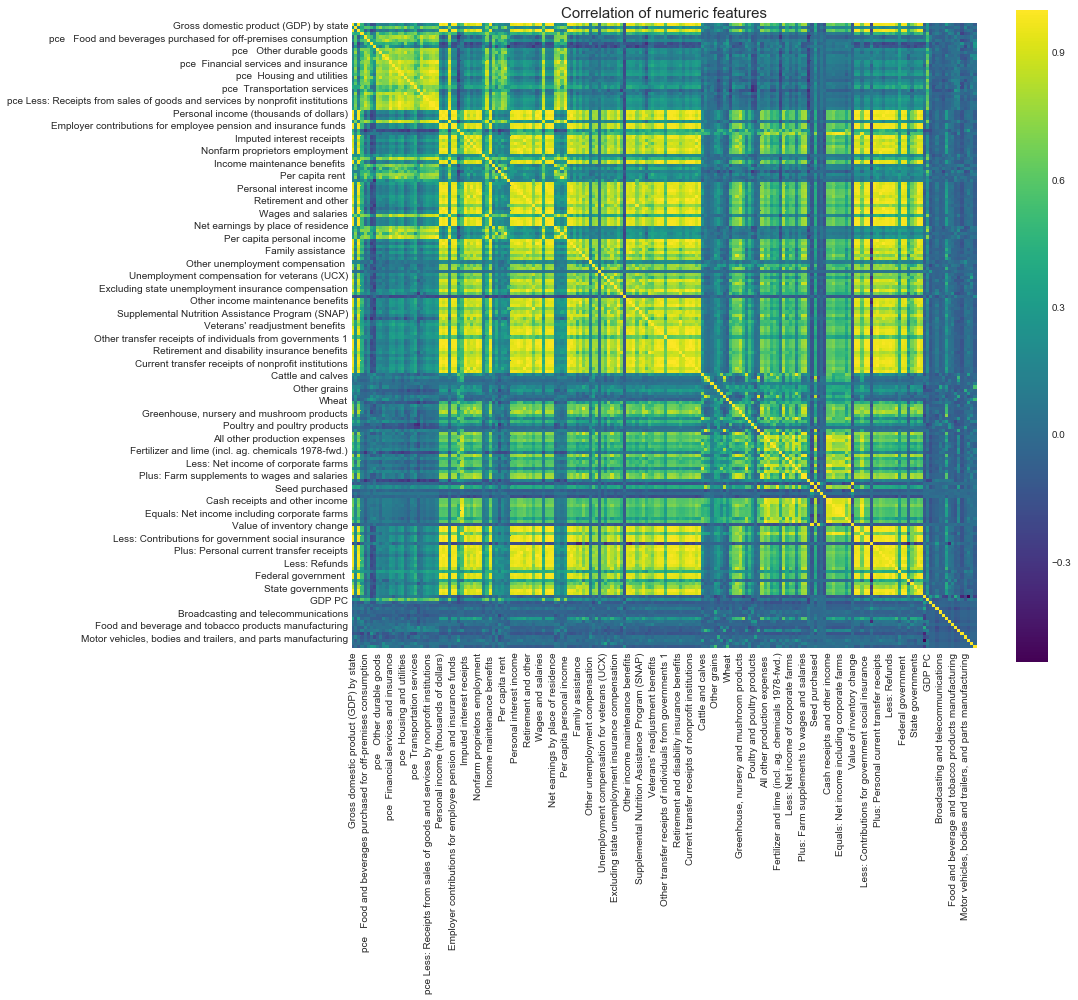

In [115]:
f, ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of numeric features', size = 15)
sns.heatmap(features.corr(), square=True, vmax=1, cmap='viridis')

________

# Running the regressions

## Working with expand establish as target

In [220]:
X = features.drop(['Wage and salary employment', 'Population (persons) ', 'Total employment',
                  'Total employment (number of jobs)', 'Real GDP by state'], axis=1)
y = expand_establish

In [234]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(features))
data_normalized.columns = features.columns

In [257]:
# Create correlation matrix
corr_matrix = data_normalized.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [258]:
X_new = data_normalized.drop(to_drop, axis=1)
X_new.shape

(1000, 64)

In [268]:
# Create and fit selector
selector = SelectKBest(f_regression, k=40)
selector.fit(X_new, y)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [269]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest = X_new.iloc[:,idxs_selected]
X_kbest = sm.add_constant(X_kbest)

In [276]:
# creating a train/test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)

In [275]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       expand_establish   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     247.3
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:41:05   Log-Likelihood:                -9744.0
No. Observations:                 700   AIC:                         1.957e+04
Df Residuals:                     659   BIC:                         1.976e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    -2.067e+05   2.11e+05     -0.978      0.329   -6.22e+05    2.09e+05
Gross domestic product (GDP) by state                                                     7.968e+06   3.47e+05     22.941      0.000    7.29e+06    8.65e+06
pce   Clothing and footwear                                                              -4.131e+05   1.58e+05     -2.611      0.009   -7.24e+05   -1.02e+05
pce   Food and beverages purchased for off-premises consumption                           1.379e+05   1.59e+05      0.870      0.385   -1.74e+05    4.49e+05
pce   Gasoline and other energy goods                                                    -1.211e+05   1.58e+05     -0.767      0.443   -4.31e+05    1.89e+05
pce   Motor vehicles and parts                                                           -3.937e+05   1.33e+05     -2.954      0.003   -6.55e+05   -1.32e+05
pce  Transportation services                                                              3.026e+05   1.79e+05      1.694      0.091   -4.82e+04    6.53e+05
pce Final consumption expenditures of nonprofit institutions serving households (NPISHs) -6.255e+05   1.48e+05     -4.219      0.000   -9.17e+05   -3.34e+05
Farm proprietors employment                                                               6.119e+05   1.54e+05      3.985      0.000     3.1e+05    9.13e+05
Farm proprietors' income                                                                  4.249e+04    2.2e+05      0.193      0.847   -3.89e+05    4.74e+05
Average nonfarm proprietors' income                                                       2.254e+05   1.15e+05      1.958      0.051    -698.322    4.52e+05
Per capita income maintenance benefits                                                   -4.046e+05   9.65e+04     -4.192      0.000   -5.94e+05   -2.15e+05
Per capita interest                                                                      -1.517e+05   1.29e+05     -1.178      0.239   -4.04e+05    1.01e+05
Unemployment insurance compensation                                                      -7.053e+05   2.42e+05     -2.919      0.004   -1.18e+06   -2.31e+05
Other unemployment compensation                                                           2.595e+04   9.02e+04      0.288      0.774   -1.51e+05    2.03e+05
Railroad retirement and disability benefits                                               4.195e+05   1.16e+05      3.606      0.000    1.91e+05    6.48e+05
Workers' compensation                                                                     6.181e+05 

### Using Decision Tree Regressor

In [299]:
from sklearn.tree import DecisionTreeRegressor
treeReg = DecisionTreeRegressor(random_state=0, max_depth=10)
modelRegTree = treeReg.fit(X_train, y_train)
print('Train Score:', treeReg.score(X_train, y_train))
print('Test Score:', treeReg.score(X_test, y_test))

Train Score: 0.9996364558696198
Test Score: 0.9543591051757723


In [310]:
features = X_kbest.columns
feature_importances = pd.DataFrame({'Feature': features, 'importance': 
                                    treeReg.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(10)

,Feature,importance
1,Gross domestic product (GDP) by state,0.731752
26,"Hay, silage, etc.",0.159386
15,Railroad retirement and disability benefits,0.054729
7,pce Final consumption expenditures of nonprofi...,0.016452
12,Per capita interest,0.012880
11,Per capita income maintenance benefits,0.005558
10,Average nonfarm proprietors' income,0.003938
3,pce Food and beverages purchased for off-pre...,0.003847
18,Other transfer receipts of individuals from go...,0.002792
22,Sorghum,0.001368


## Using XGBoost Regressor

In [315]:
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [322]:
xgb = XGBRegressor()
regressor = xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.9873882307647666